<a href="https://colab.research.google.com/github/somewhereovertherainbo/audio_processing/blob/main/audio_expt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pylab as plt

import librosa
import librosa.display
import IPython.display as ipd

# With Original Audio

In [6]:
ipd.Audio('/content/00_Original.wav')

In [7]:
y, sr = librosa.load('/content/00_Original.wav')

In [8]:
print(f'Length of y is : {len(y)}')
print(f'Sampling rate is : {sr}')
print(f'Audio signal samples: {y[:5]}')
print(f'Play time of audio is : num of samples/num of smaples per second : len(y)/sr : {len(y)/sr} sec')

Length of y is : 1343110
Sampling rate is : 22050
Audio signal samples: [-0.00025759 -0.0002945  -0.00026843 -0.00031326 -0.00034365]
Play time of audio is : num of samples/num of smaples per second : len(y)/sr : 60.912018140589566 sec


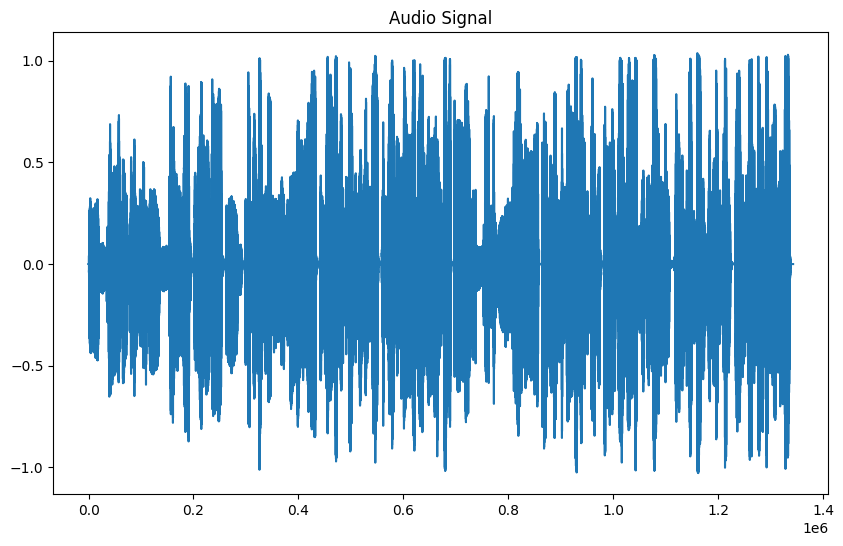

In [9]:
#Visualizing audio signal
plt.figure(figsize=(10,6))
plt.plot(y)
plt.title('Audio Signal')
plt.show()

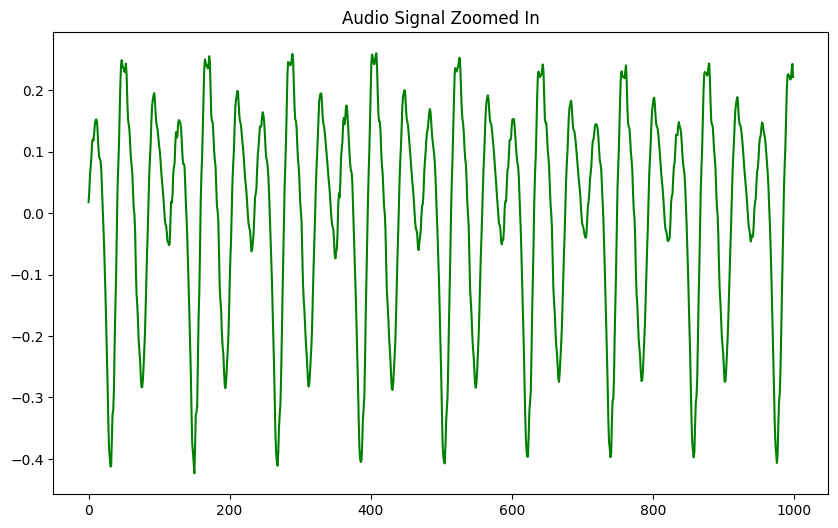

In [10]:
#Visualizing audio signal
plt.figure(figsize=(10,6))
plt.plot(y[10000:11000], color = 'green')
plt.title('Audio Signal Zoomed In')
plt.show()

In [11]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)
S_db.shape

(1025, 2624)

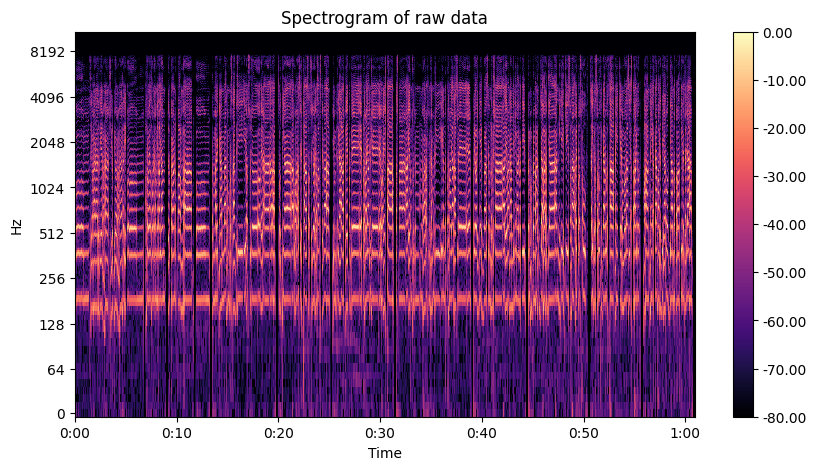

In [12]:
fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Spectrogram of raw data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [13]:
S = librosa.feature.melspectrogram(y=y,
                                  sr=sr,
                                  n_mels = 80)
S_db_mel = librosa.amplitude_to_db(S, ref = np.max)
S_db_mel.shape

(80, 2624)

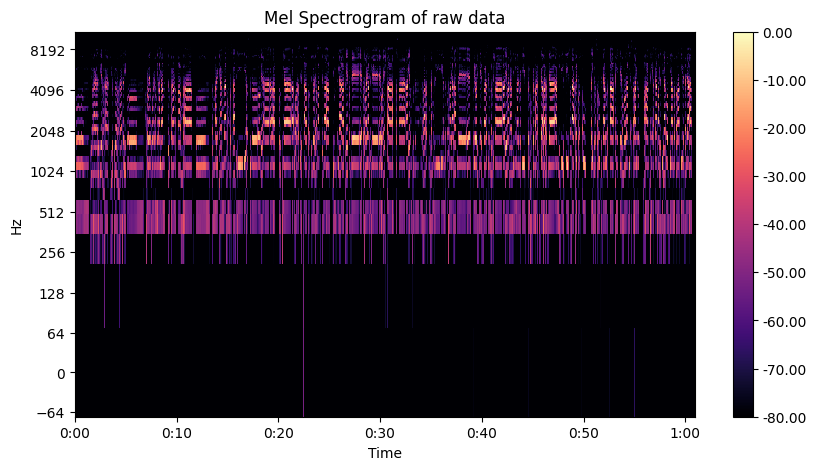

In [14]:
fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db_mel,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of raw data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

# With Resampled Audio

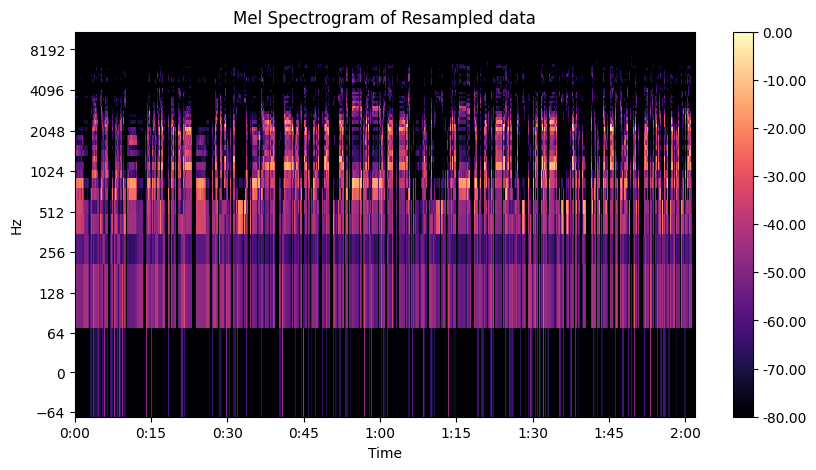

In [15]:
y_rs, sr_rs = librosa.load('/content/00_SR_change_2.wav')

S_rs = librosa.feature.melspectrogram(y=y_rs,
                                  sr=sr_rs,
                                  n_mels = 80)
S_rs_db_mel = librosa.amplitude_to_db(S_rs, ref = np.max)
S_rs_db_mel.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_rs_db_mel,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of Resampled data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

# With WSOLA audio

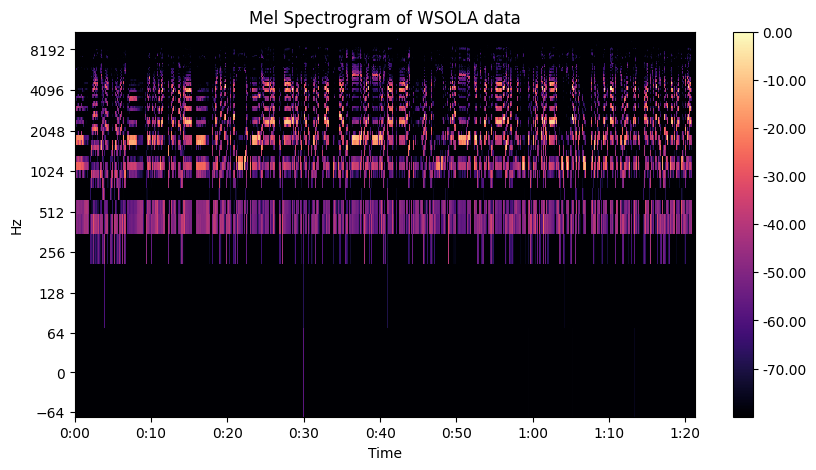

In [16]:
y_wsola, sr_wsola = librosa.load('/content/00_wsola_change.wav')

S_wsola = librosa.feature.melspectrogram(y=y_wsola,
                                  sr=sr_wsola,
                                  n_mels =  80)
S_wsola_db_mel = librosa.amplitude_to_db(S_wsola, ref = np.max)
S_wsola_db_mel.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_wsola_db_mel,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of WSOLA data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [17]:
S_rs_db_mel.shape, S_wsola_db_mel.shape, S_db_mel.shape

((80, 5247), (80, 3498), (80, 2624))

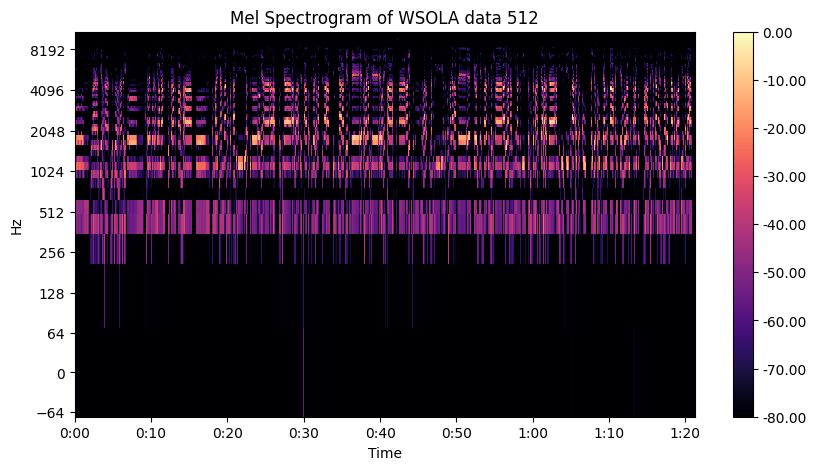

In [18]:
y_wsola_512, sr_wsola_512 = librosa.load('/content/00_wsola_change_512.wav')

S_wsola_512 = librosa.feature.melspectrogram(y=y_wsola_512,
                                  sr=sr_wsola_512,
                                  n_mels =  80)
S_wsola_db_mel_512 = librosa.amplitude_to_db(S_wsola_512, ref = np.max)
S_wsola_db_mel_512.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_wsola_db_mel_512,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of WSOLA data 512')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

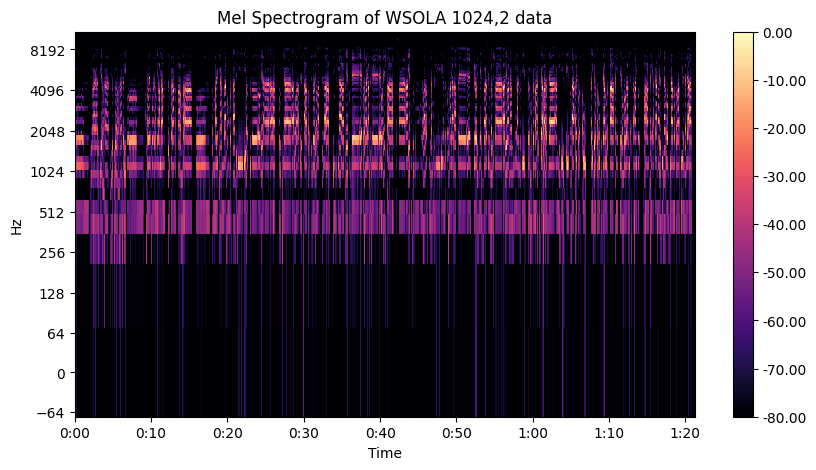

In [43]:
y_wsola_10242, sr_wsola_10242 = librosa.load('/content/00_wsola_change_10242.wav')

S_wsola_10242 = librosa.feature.melspectrogram(y=y_wsola_10242,
                                  sr=sr_wsola,
                                  n_mels =  80)
S_wsola_db_mel_10242 = librosa.amplitude_to_db(S_wsola_10242, ref = np.max)
S_wsola_db_mel_10242.shape

fig,ax =plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_wsola_db_mel_10242,
                               x_axis = 'time',
                               y_axis = 'log',
                               ax= ax)
ax.set_title('Mel Spectrogram of WSOLA 1024,2 data')
fig.colorbar(img, ax=ax, format = f'%0.2f')
plt.show()

In [20]:
ss_rs = np.sum(S_rs_db_mel, axis = 1)
ss_wsola = np.sum(S_wsola_db_mel, axis = 1)
ss_raw = np.sum(S_db_mel, axis = 1)
ss_wsola_512 = np.sum(S_wsola_db_mel_512, axis = 1)
ss_wsola_10242 = np.sum(S_wsola_db_mel_10242, axis = 1)

In [21]:
count = len([x for x in S_db_mel[0] if np.round(x) != -80])
print(count/len(S_db_mel[0]))
count = len([x for x in S_rs_db_mel[0] if np.round(x) != -80])
print(count/len(S_rs_db_mel[0]))
count = len([x for x in S_wsola_db_mel[0] if np.round(x) != -80])
print(count/len(S_wsola_db_mel[0]))
count = len([x for x in S_wsola_db_mel_512[0] if np.round(x) != -80])
print(count/len(S_wsola_db_mel_512[0]))

0.014100609756097561
0.2839717934057557
0.008290451686678102
0.009148084619782733


In [22]:
S_wsola_db_mel[0]

array([-79.99999, -79.99999, -79.99999, ..., -79.99999, -79.99999,
       -79.99999], dtype=float32)

In [23]:
np.average(ss_rs - ss_raw), np.average(ss_raw/S_db_mel.shape[1] - ss_wsola/S_wsola_db_mel.shape[1]), np.average(ss_raw/S_db_mel.shape[1] - ss_wsola_512/S_wsola_db_mel_512.shape[1]), np.average(ss_raw/S_db_mel.shape[1] - ss_wsola_10242/S_wsola_db_mel_10242.shape[1])

(-198716.5, 0.90005887, 0.5571579, -0.7444838)

In [24]:
S_wsola_db_mel.shape, S_db_mel.shape, S_wsola_db_mel_512.shape

((80, 3498), (80, 2624), (80, 3498))

In [53]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def filtered_mel(audio_path):


  # Load your audio file
  y_wsola_10242, sr_wsola_10242 = librosa.load(audio_path)

  # Compute the Mel spectrogram
  S_wsola_10242 = librosa.feature.melspectrogram(y=y_wsola_10242, sr=sr_wsola_10242, n_mels=80)

  # Convert to dB
  S_wsola_db_mel_10242 = librosa.amplitude_to_db(S_wsola_10242, ref=np.max)

  # Get the Mel filter bank
  mel_filters = librosa.filters.mel(sr=sr_wsola_10242, n_fft=2048, n_mels=80)

  # Find the index where the filter's center frequency is less than 512 Hz
  frequencies = librosa.core.mel_frequencies(n_mels=80, fmin=0, fmax=sr_wsola_10242/2)
  index_less_than_512 = np.where(frequencies > 256)[0]

  # Select only the rows with center frequencies less than 512 Hz
  S_wsola_db_mel_10242_filtered = S_wsola_db_mel_10242[index_less_than_512, :]

  return S_wsola_db_mel_10242_filtered

# Plot the filtered Mel spectrogram
# fig, ax = plt.subplots(figsize=(10, 5))
# img = librosa.display.specshow(S_wsola_db_mel_10242_filtered,
#                                sr=sr_wsola_10242,
#                                x_axis='time',
#                                y_axis='mel',
#                                fmin=0,
#                                fmax=512,
#                                ax=ax)
# ax.set_title('Filtered Mel Spectrogram (frequencies > 256 Hz)')
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
# plt.show()

In [68]:
S_raw = filtered_mel('/content/00_Original.wav')
S_rs = filtered_mel('/content/00_SR_change_2.wav')
S_wsola = filtered_mel('/content/00_wsola_change.wav')
S_wsola_512 = filtered_mel('/content/00_wsola_change_512.wav')
S_wsola_10242 = filtered_mel('/content/00_wsola_change_10242.wav')

In [69]:
resampled_score = np.average(S_raw, axis = 1) - np.average(S_rs, axis = 1)
wsola_score = np.average(S_raw, axis = 1) - np.average(S_wsola, axis = 1)
wsola_512_score = np.average(S_raw, axis = 1) - np.average(S_wsola_512, axis = 1)
wsola_10242_score = np.average(S_raw, axis = 1) - np.average(S_wsola_10242, axis = 1)

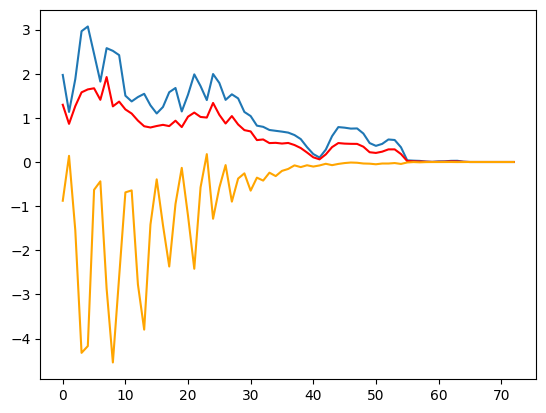

In [71]:
# plt.plot(resampled_score, color = 'green'),
plt.plot(wsola_score), plt.plot(wsola_512_score, color = 'red'), plt.plot(wsola_10242_score, color = 'orange')
plt.show()

# Improvisation:

1. First look at frequencies below 512 on the mel scale. Here, the spectra must look the same.

2. The original mel spectrum and the new mel graph must have close average values for each frequency in this region.

3. Exclude the specturm that do not have close values to the original in this region.